# VJEŽBA - Utjecaj udaljenosti od mora na temperaturu u gradu
Istrazite koliko udaljenost od moraima utjecaja na temperature. Za primjer uzmite 10 gradova u istri:
1. Pula
2. Pazin
3. Motovun
4. Labin
5. Buzet
6. Buje
7. Višnjan
8. Kanfanar
9. Žminj
10. Vodnjan

Prikupite i obradite podatke, te donesite neki zakljucak na osnovu istih

**NAPOMENA:** Za kvalitetnu analizu trebala bi nam velika količina podataka i trebali bismo svakodnevno mjeriti temperature za svaki od ciljanih gradova tijekom nekoliko godina ili desetljeca


## PRIKPULJANJE PODATAKA
1. udaljenost od mora -> Gooogle maps ili neka slicna stranica koja daje te informacije (nije 100% sigurno, za tocne informacije trebali bi nam podatci od geodetskog zavoda ili georafskog ili nesto slicno)
2. temperatura tj. meteo podatci za pojedine gradove -> openweather (https://openweathermap.org/api) (https://openweathermap.org/api/one-call-api#history)

### INFO ZA OPENWEATHERMAP

na linku https://openweathermap.org/api/one-call-api#history nam pise da podatci koji nam trebaju su: geografske koordinate, datetime za datume koji nas zanimaju (u unix formatu) i api_key
1. geokorodinate https://latitude.to
2. vrijeme u unix formatu https://time.is/Unix_time_converter
3. api_key -> sa acc-a

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime
import json
import requests

In [2]:
%matplotlib inline

## POSTAVLJANJE VRIJEDNOSTI s neta

In [3]:
cities = {
    'Pula': [0, 44.86833, 13.84806],
        'Pazin': [30, 45.23878, 13.93497],
    'Motovun': [25, 45.33673, 13.82821],
    'Labin': [4, 45.09485, 14.12319],
    'Buzet': [40, 45.40788, 13.96559],
    'Buje': [12, 45.40837, 13.65914],
    'Visnjan': [10, 45.27602, 13.71887],
    'Kanfanar': [17, 45.12284, 13.83850],
    'Zminj': [23, 45.14391, 13.90868],
    'Vodnjan': [7, 44.95896, 13.85134],
}

In [4]:
unix_dates = [
    1696863600,
    1696777200,
    1696690800,
    1696604400,
    1696518000,
]

In [5]:
api_key = 'a38edf57331518ae5f14c42cff1ba255'

In [6]:
link = lambda lat, lon, time, key: f'https://api.openweathermap.org/data/2.5/onecall/timemachine?lat={lat}&lon={lon}&dt={time}&appid={key}'

## PROUCAVANJE PODATAKA

In [8]:
pula = json.loads(requests.get(link(cities["Pula"][1], cities["Pula"][2], unix_dates[0], api_key)).text)
pula

{'lat': 44.8683,
 'lon': 13.8481,
 'timezone': 'Europe/Zagreb',
 'timezone_offset': 7200,
 'current': {'dt': 1696863600,
  'sunrise': 1696828300,
  'sunset': 1696869123,
  'temp': 295.46,
  'feels_like': 295.65,
  'pressure': 1019,
  'humidity': 73,
  'dew_point': 290.39,
  'uvi': 0.6,
  'clouds': 40,
  'visibility': 10000,
  'wind_speed': 3.6,
  'wind_deg': 110,
  'weather': [{'id': 802,
    'main': 'Clouds',
    'description': 'scattered clouds',
    'icon': '03d'}]},
 'hourly': [{'dt': 1696809600,
   'temp': 290.46,
   'feels_like': 290.54,
   'pressure': 1022,
   'humidity': 88,
   'dew_point': 288.45,
   'uvi': 0,
   'clouds': 70,
   'visibility': 8000,
   'wind_speed': 1.54,
   'wind_deg': 30,
   'weather': [{'id': 803,
     'main': 'Clouds',
     'description': 'broken clouds',
     'icon': '04n'}]},
  {'dt': 1696813200,
   'temp': 289.46,
   'feels_like': 289.6,
   'pressure': 1022,
   'humidity': 94,
   'dew_point': 288.49,
   'uvi': 0,
   'clouds': 75,
   'visibility': 8000,


In [9]:
list(pula.keys())

['lat', 'lon', 'timezone', 'timezone_offset', 'current', 'hourly']

In [10]:
pula['hourly']

[{'dt': 1696809600,
  'temp': 290.46,
  'feels_like': 290.54,
  'pressure': 1022,
  'humidity': 88,
  'dew_point': 288.45,
  'uvi': 0,
  'clouds': 70,
  'visibility': 8000,
  'wind_speed': 1.54,
  'wind_deg': 30,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}]},
 {'dt': 1696813200,
  'temp': 289.46,
  'feels_like': 289.6,
  'pressure': 1022,
  'humidity': 94,
  'dew_point': 288.49,
  'uvi': 0,
  'clouds': 75,
  'visibility': 8000,
  'wind_speed': 2.06,
  'wind_deg': 80,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}]},
 {'dt': 1696816800,
  'temp': 288.46,
  'feels_like': 288.66,
  'pressure': 1021,
  'humidity': 100,
  'dew_point': 288.46,
  'uvi': 0,
  'clouds': 63,
  'visibility': 7000,
  'wind_speed': 3.09,
  'wind_deg': 60,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}]},
 {'dt': 1696820400,
  'temp': 290.46,
  'fe

Uzet cemo sljedece podatke temp, vlaznost, tlak zraka, opis, datum i vrijeme, i smjeri i jacinu vjetra

## PRIKUPNJANJE PODATAKA S OPENWETHERA

In [13]:
def get_data_for_city_by_hour(data, name):
    temp = data['temp'] - 273.15
    humidity = data['humidity']
    pressure =  data['pressure']
    description = data['weather'][0]['description']
    dt = data['dt']
    wind_speed = data['wind_speed']
    wind_deg = data['wind_deg']
    
    ret = [
        round(temp, 2),
        humidity,
        pressure,
        description,
        dt,
        wind_speed,
        wind_deg,
        name.lower(),
        datetime.datetime.strftime(datetime.datetime.fromtimestamp(dt), '%Y-%m-%d %H:%M:%S'),
    ]
    return ret

In [15]:
for city, val in cities.items():
    df_list = []
    for day in unix_dates:
        city_data = json.loads(requests.get(link(val[1], val[2], day, api_key)).text)

        for hourly in city_data['hourly']:
            df = get_data_for_city_by_hour(hourly, city)
            df.append(val[0])

            df_list.append(df)

    clms = ['temp', 'humidity', 'pressure', 'description', 'dt', 'wind_speed', 'wind_deg', 'city', 'date', 'distance']
    save_df = pd.DataFrame(df_list, columns=clms)
    save_df.to_csv(f'./istra_data/df_{city.lower()}.csv', mode='w')

        

## UCITALI i PROVJERILI STANJE PODATAKA

In [16]:
df_pula = pd.read_csv('./istra_data/df_pula.csv')
df_pazin = pd.read_csv('./istra_data/df_pazin.csv')
df_motovun = pd.read_csv('./istra_data/df_motovun.csv')
df_labin = pd.read_csv('./istra_data/df_labin.csv')
df_buzet = pd.read_csv('./istra_data/df_buzet.csv')
df_buje = pd.read_csv('./istra_data/df_buje.csv')
df_visnjan = pd.read_csv('./istra_data/df_visnjan.csv')
df_kanfanar = pd.read_csv('./istra_data/df_kanfanar.csv')
df_zminj = pd.read_csv('./istra_data/df_zminj.csv')
df_vodnjan = pd.read_csv('./istra_data/df_vodnjan.csv')

In [17]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = [10, 8]

In [18]:
df_pula

Unnamed: 0   temp  humidity  pressure    description          dt  \
0             0  17.31        88      1022  broken clouds  1696809600   
1             1  16.31        94      1022  broken clouds  1696813200   
2             2  15.31       100      1021  broken clouds  1696816800   
3             3  17.31       100      1021           mist  1696820400   
4             4  17.31        94      1021            fog  1696824000   
..          ...    ...       ...       ...            ...         ...   
109         109  17.31        88      1023      clear sky  1696532400   
110         110  17.31        88      1023      clear sky  1696536000   
111         111  17.31        88      1023      clear sky  1696539600   
112         112  18.31        82      1023      clear sky  1696543200   
113         113  17.31        72      1023      clear sky  1696546800   

     wind_speed  wind_deg  city                 date  distance  
0          1.54        30  pula  2023-10-09 02:00:00         0  
1          2.06        80  pula  2023-10-09 03:00:00         0  
2          3.09        60  pula  2023-10-09 04:00:00         0  
3          3.09        90  pula  2023-10-09 05:00:00         0  
4          1.54        50  pula  2023-10-09 06:00:00         0  
..          ...       ...   ...                  ...       ...  
109        1.54        50  pula  2023-10-05 21:00:00         0  
110        1.03         0  pula  2023-10-05 22:00:00         0  
111        0.51         0  pula  2023-10-05 23:00:00         0  
112        1.03        60  pula  2023-10-06 00:00:00         0  
113        1.54        50  pula  2023-10-06 01:00:00         0  

[114 rows x 11 columns]

In [20]:
df_pula.columns

Index(['Unnamed: 0', 'temp', 'humidity', 'pressure', 'description', 'dt',
       'wind_speed', 'wind_deg', 'city', 'date', 'distance'],
      dtype='object')

In [22]:
df_pula.isna().sum()

Unnamed: 0     0
temp           0
humidity       0
pressure       0
description    0
dt             0
wind_speed     0
wind_deg       0
city           0
date           0
distance       0
dtype: int64

## Obrada i prikaz podataka o temperaturi

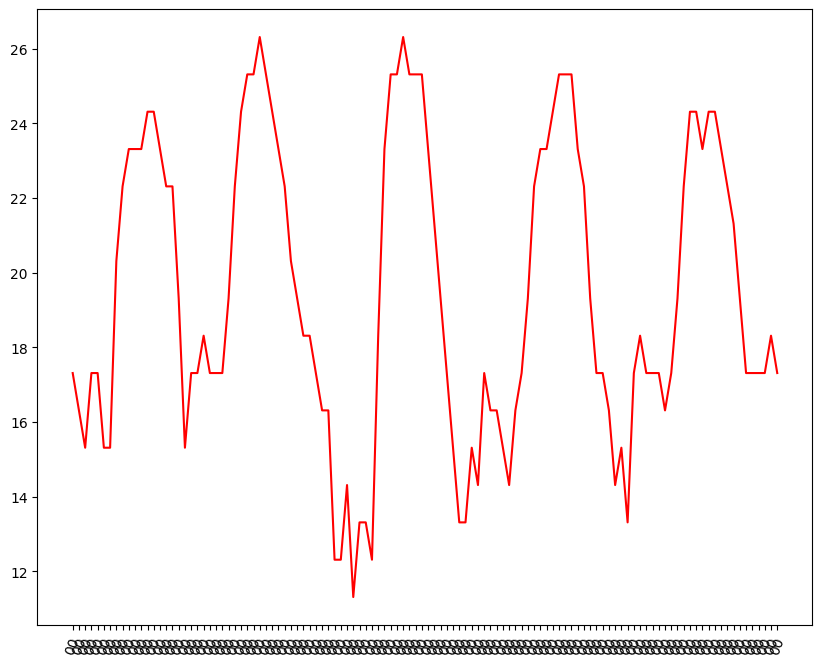

In [26]:
x1 = df_pula['date']
y1 = df_pula['temp']
fig, ax = plt.subplots()
plt.xticks(rotation = 70)
hours = mdates.DateFormatter('%H')
ax.xaxis.set_major_formatter(hours)
ax.plot(x1, y1, 'r')

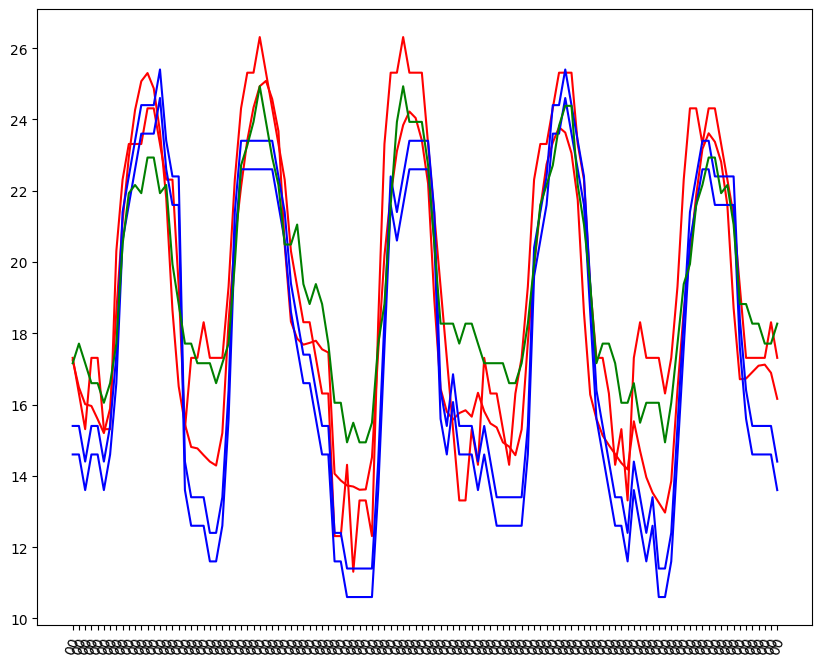

In [31]:
x1 = df_pula['date']
y1 = df_pula['temp']
x2 = df_pazin['date']
y2 = df_pazin['temp']
x3 = df_motovun['date']
y3 = df_motovun['temp']
x4 = df_labin['date']
y4 = df_labin['temp']
x5 = df_buzet['date']
y5 = df_buzet['temp']
x6 = df_buje['date']
y6 = df_buje['temp']
x7 = df_visnjan['date']
y7 = df_visnjan['temp']
x8 = df_kanfanar['date']
y8 = df_kanfanar['temp']
x9 = df_zminj['date']
y9 = df_zminj['temp']
x10 = df_vodnjan['date']
y10 = df_vodnjan['temp']

fig, ax = plt.subplots()
plt.xticks(rotation = 70)
hours = mdates.DateFormatter('%H')
ax.xaxis.set_major_formatter(hours)
plt.plot(x1, y1, 'r', x2, y2, 'r', x5, y5, 'b', x3, y3, 'b', x4, y4, 'g')
#plt.plot(x6, y6, 'r', x9, y9, 'r', x7, y7, 'b', x8, y8, 'b', x10, y10, 'g')

In [32]:
dist = [
    df_pula['distance'][0],
    df_pazin['distance'][0],
    df_motovun['distance'][0],
    df_labin['distance'][0],
    df_buzet['distance'][0],
    df_buje['distance'][0],
    df_visnjan['distance'][0],
    df_kanfanar['distance'][0],
    df_zminj['distance'][0],
    df_vodnjan['distance'][0],
]
tmp_max = [
    df_pula['temp'].max(),
    df_pazin['temp'].max(),
    df_motovun['temp'].max(),
    df_labin['temp'].max(),
    df_buzet['temp'].max(),
    df_buje['temp'].max(),
    df_visnjan['temp'].max(),
    df_kanfanar['temp'].max(),
    df_zminj['temp'].max(),
    df_vodnjan['temp'].max(),
]
tmp_min = [
    df_pula['temp'].min(),
    df_pazin['temp'].min(),
    df_motovun['temp'].min(),
    df_labin['temp'].min(),
    df_buzet['temp'].min(),
    df_buje['temp'].min(),
    df_visnjan['temp'].min(),
    df_kanfanar['temp'].min(),
    df_zminj['temp'].min(),
    df_vodnjan['temp'].min(),
]
tmp_dif = np.array(tmp_max) - np.array(tmp_min) 

tmp_mean = [
    df_pula['temp'].mean(),
    df_pazin['temp'].mean(),
    df_motovun['temp'].mean(),
    df_labin['temp'].mean(),
    df_buzet['temp'].mean(),
    df_buje['temp'].mean(),
    df_visnjan['temp'].mean(),
    df_kanfanar['temp'].mean(),
    df_zminj['temp'].mean(),
    df_vodnjan['temp'].mean(),
]

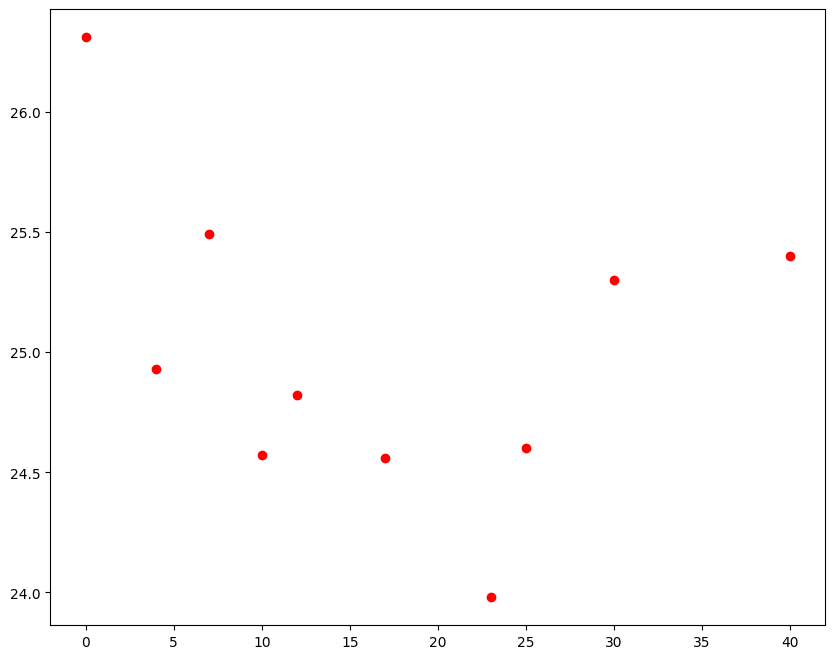

In [34]:
plt.plot(dist, tmp_max, 'ro')

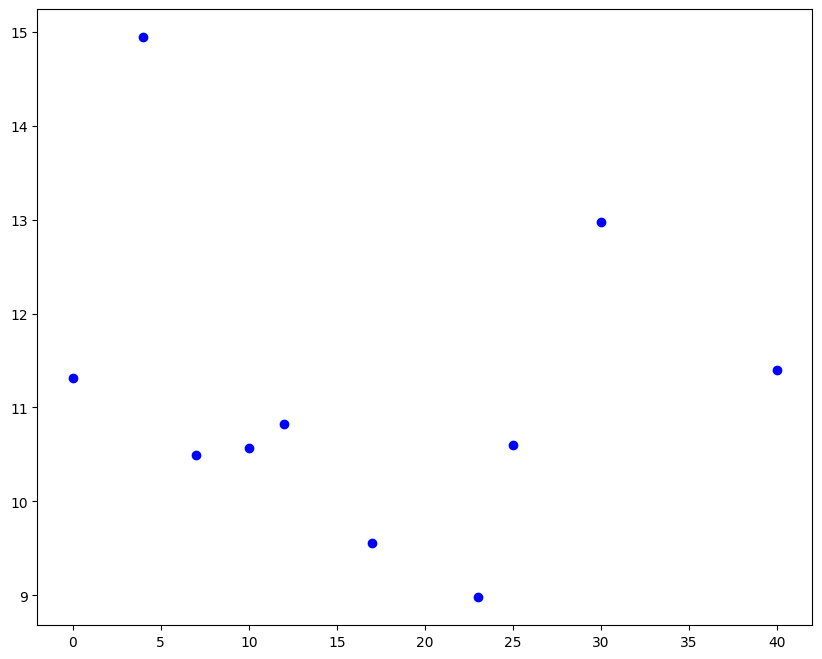

In [35]:
plt.plot(dist, tmp_min, 'bo')

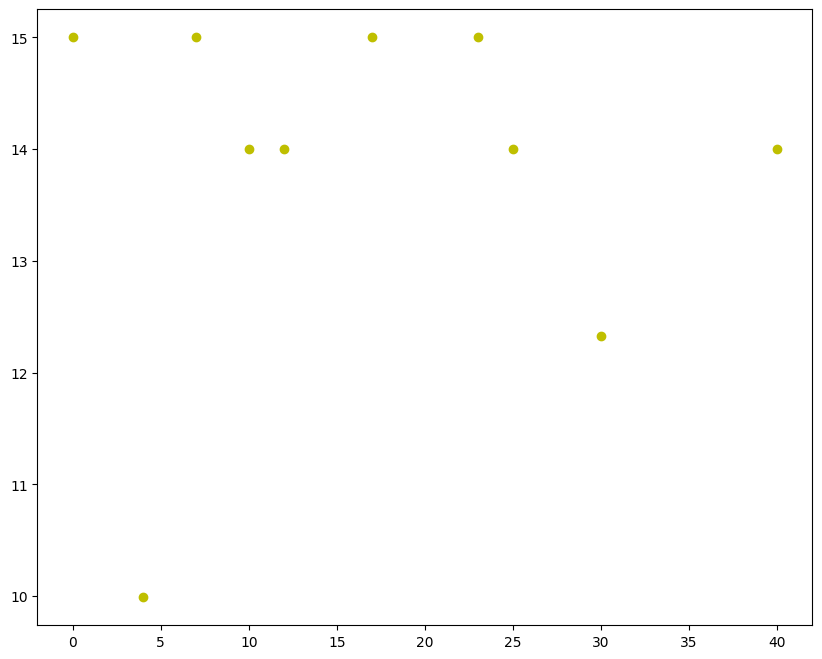

In [60]:
plt.plot(dist, tmp_dif, 'yo')

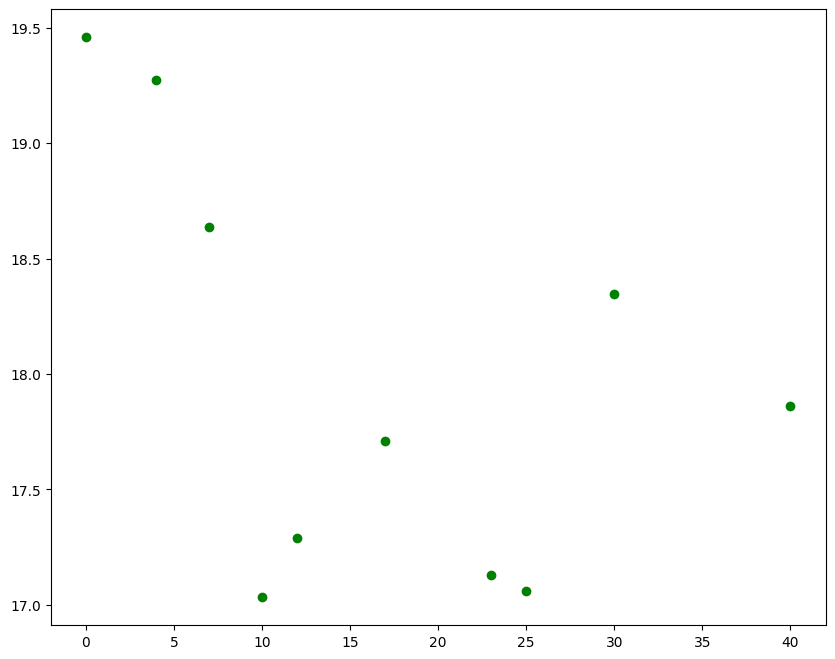

In [37]:
plt.plot(dist, tmp_mean, 'go')

## Obrada i prikaz podataka o vlaznosti zraka

In [38]:
hum_max = [
    df_pula['humidity'].max(),
    df_pazin['humidity'].max(),
    df_motovun['humidity'].max(),
    df_labin['humidity'].max(),
    df_buzet['humidity'].max(),
    df_buje['humidity'].max(),
    df_visnjan['humidity'].max(),
    df_kanfanar['humidity'].max(),
    df_zminj['humidity'].max(),
    df_vodnjan['humidity'].max(),
]
hum_min = [
    df_pula['humidity'].min(),
    df_pazin['humidity'].min(),
    df_motovun['humidity'].min(),
    df_labin['humidity'].min(),
    df_buzet['humidity'].min(),
    df_buje['humidity'].min(),
    df_visnjan['humidity'].min(),
    df_kanfanar['humidity'].min(),
    df_zminj['humidity'].min(),
    df_vodnjan['humidity'].min(),
]
hum_dif = np.array(hum_max) - np.array(hum_min) 

hum_mean = [
    df_pula['humidity'].mean(),
    df_pazin['humidity'].mean(),
    df_motovun['humidity'].mean(),
    df_labin['humidity'].mean(),
    df_buzet['humidity'].mean(),
    df_buje['humidity'].mean(),
    df_visnjan['humidity'].mean(),
    df_kanfanar['humidity'].mean(),
    df_zminj['humidity'].mean(),
    df_vodnjan['humidity'].mean(),
]

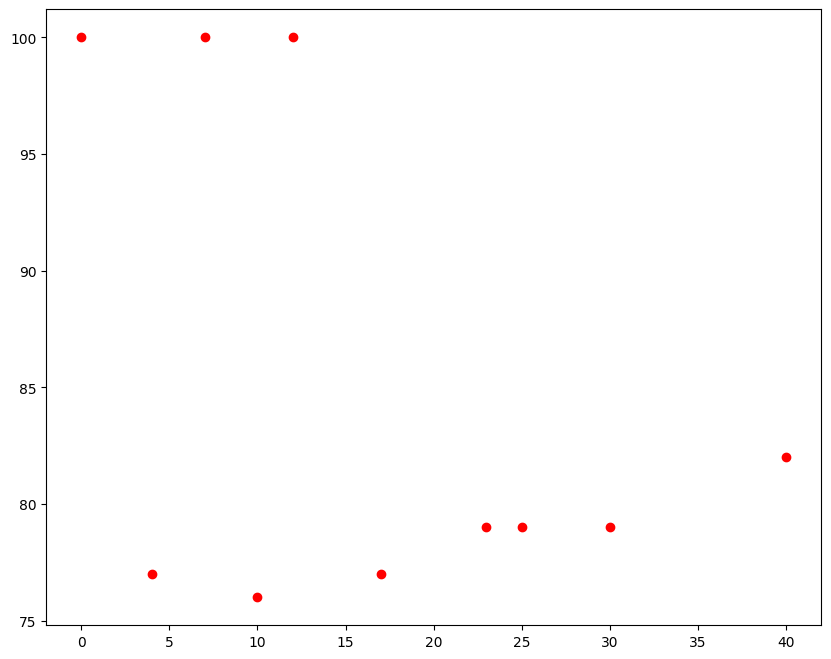

In [40]:
plt.plot(dist, hum_max, 'ro')

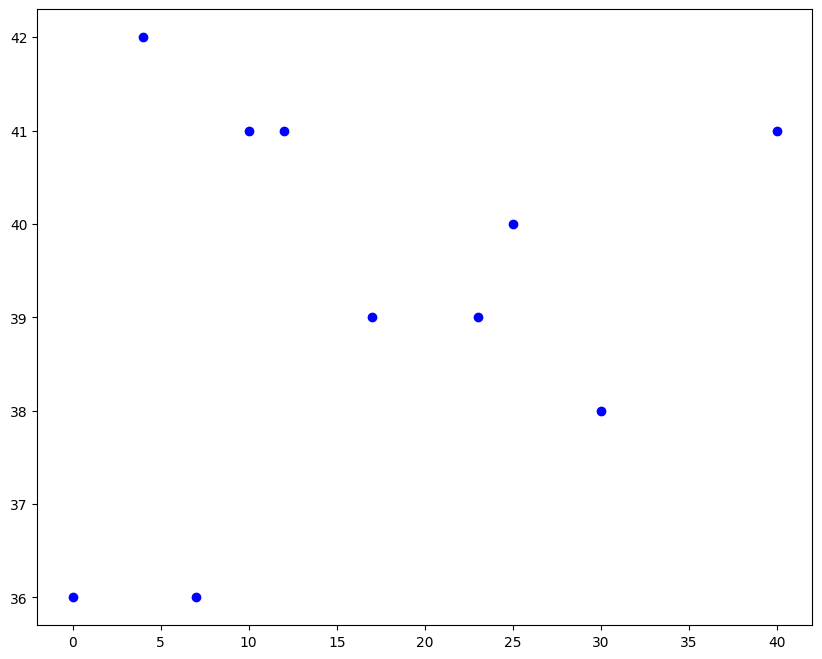

In [41]:
plt.plot(dist, hum_min, 'bo')

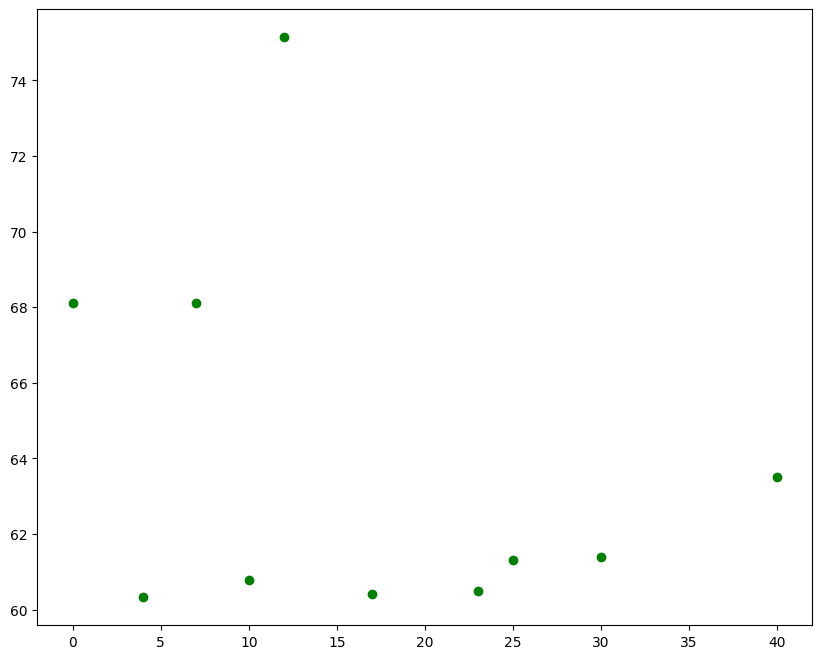

In [42]:
plt.plot(dist, hum_mean, 'go')

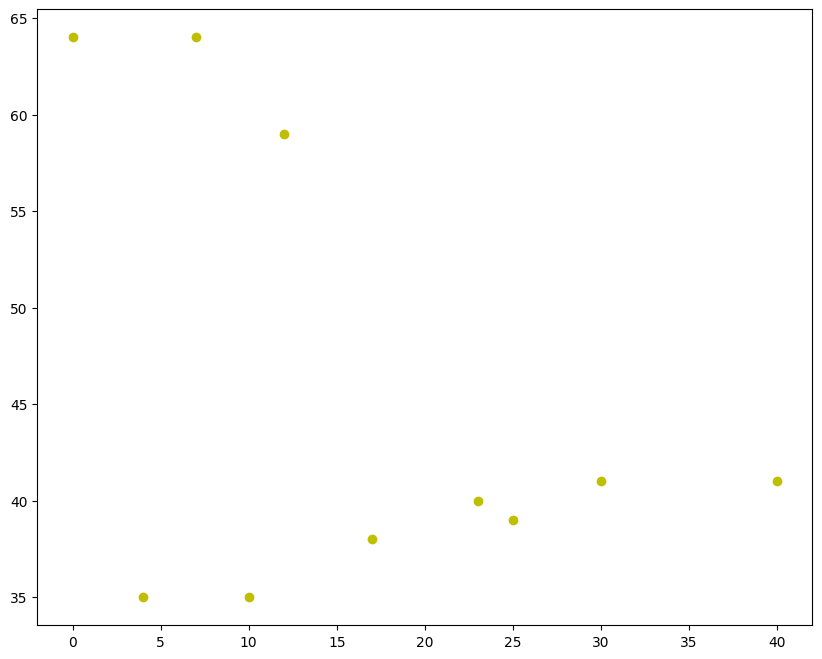

In [43]:
plt.plot(dist, hum_dif, 'yo')

## Obrada i prikaz podataka o smjeru i jacini vjetra

In [49]:
def show_wind_rose(val, name, max_val):
    N = 8
    theta = np.arange(0., 2 * np.pi, 2 * np.pi / N)
    radii = np.array(val)
    plt.axes([0.025, 0.025, 0.95, 0.95], polar=True)
    colors = [(1 - x/max_val, 1 - x/max_val, 0.75) for x in radii]
    plt.bar(theta + np.pi / N, radii, width=(2 * np.pi / N), bottom=0.0, color = colors)
    plt.title(name, x = 0.2, fontsize = 20)

[48 20 15  0  0  7 21  3]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


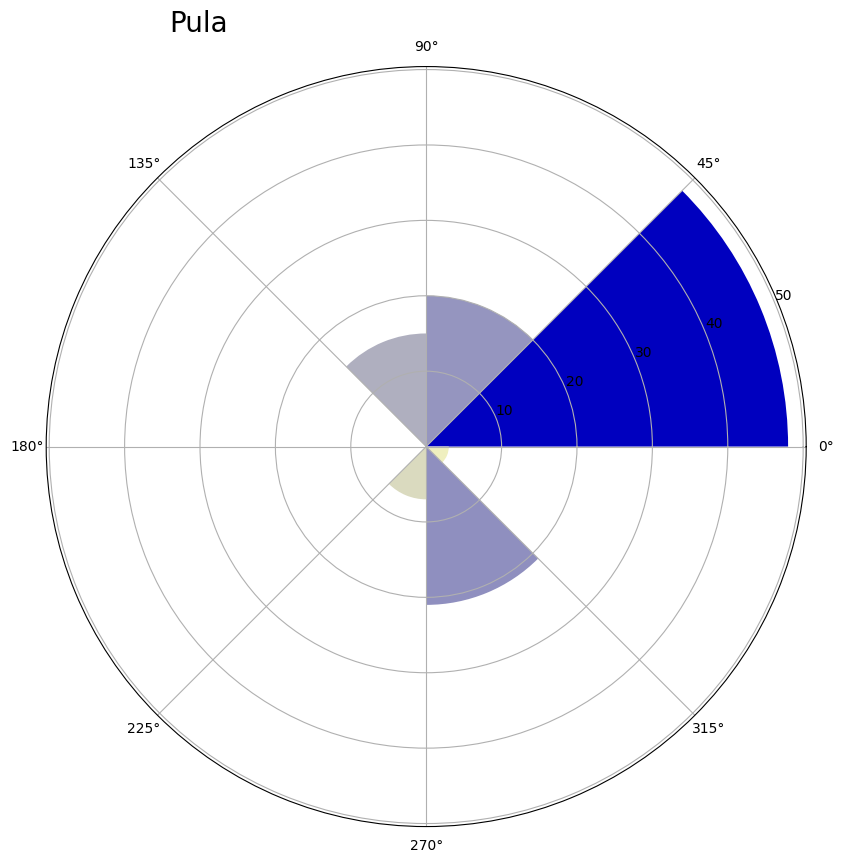

In [50]:
hist, bins = np.histogram(df_pula['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Pula', max(hist))

[35 24  7  4  5  9 17 13]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


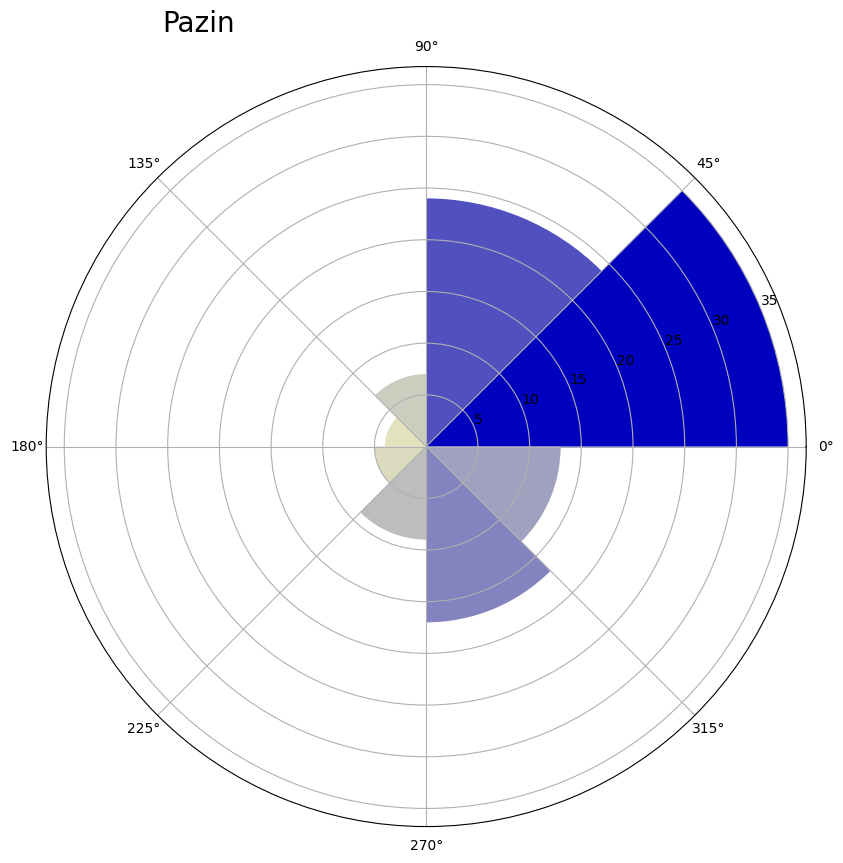

In [51]:
hist, bins = np.histogram(df_pazin['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Pazin', max(hist))

[16 52  8  1  6  3 22  6]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


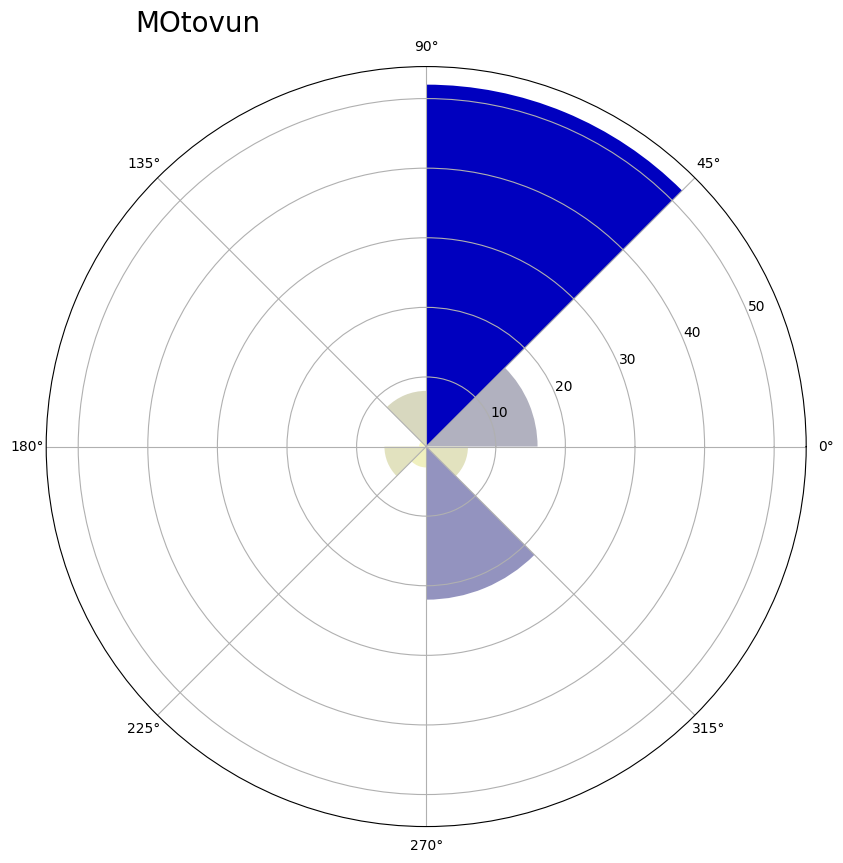

In [52]:
hist, bins = np.histogram(df_motovun['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'MOtovun', max(hist))

[37 20  3  7  6  5  7 29]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


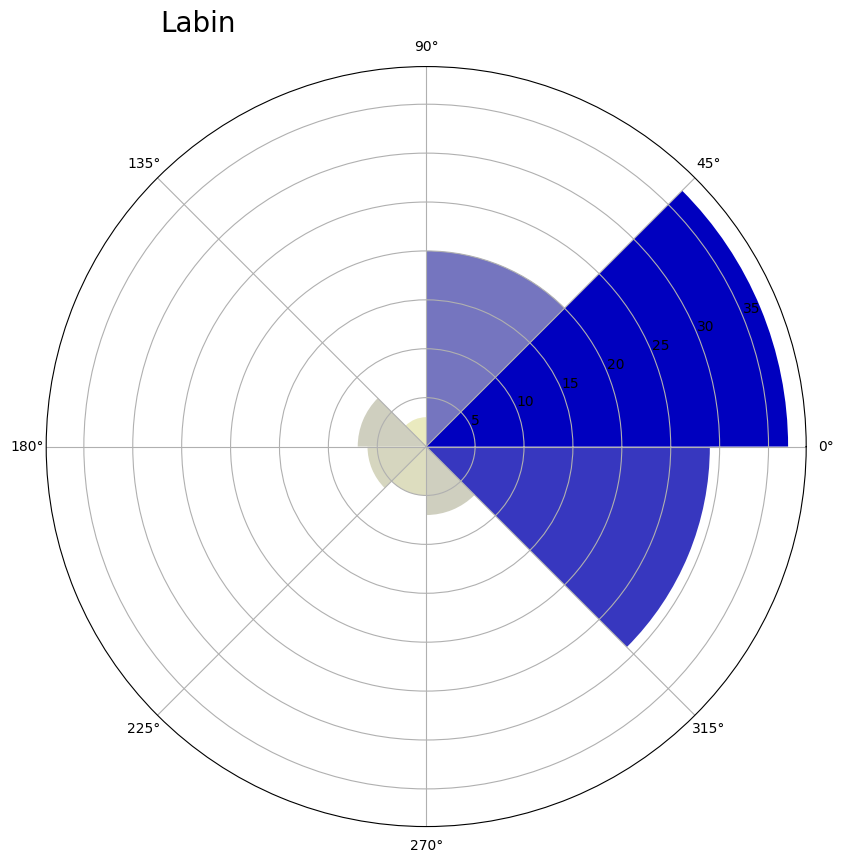

In [53]:
hist, bins = np.histogram(df_labin['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Labin', max(hist))

[26 53  2  1  7  4 18  3]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


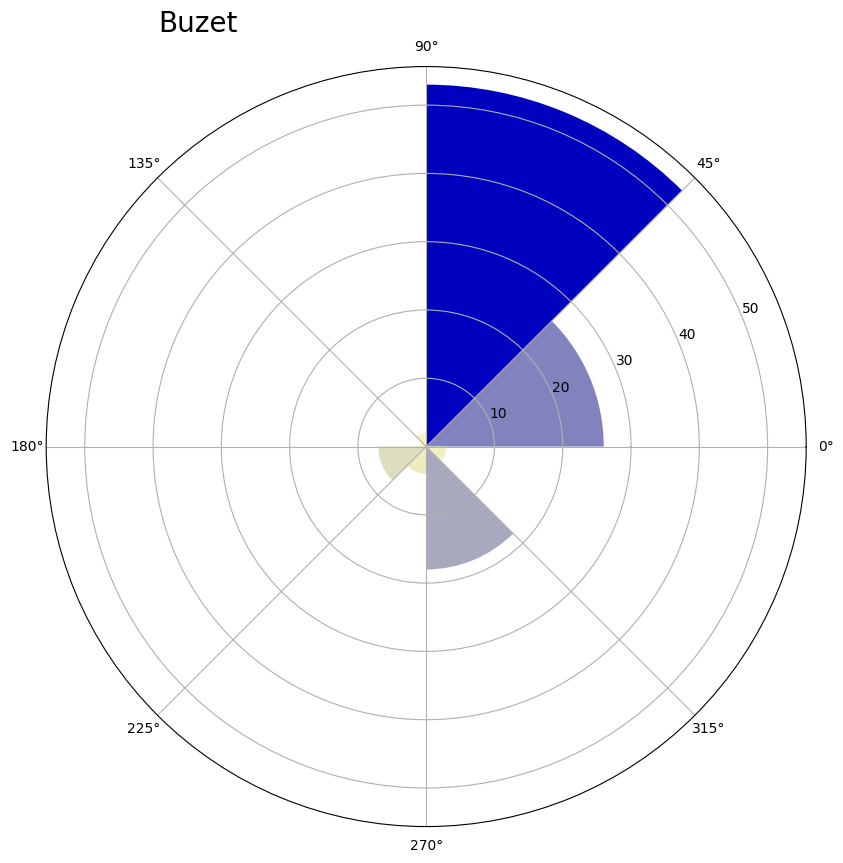

In [54]:

hist, bins = np.histogram(df_buzet['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Buzet', max(hist))

[ 9  2 69  2  2  4 20  6]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


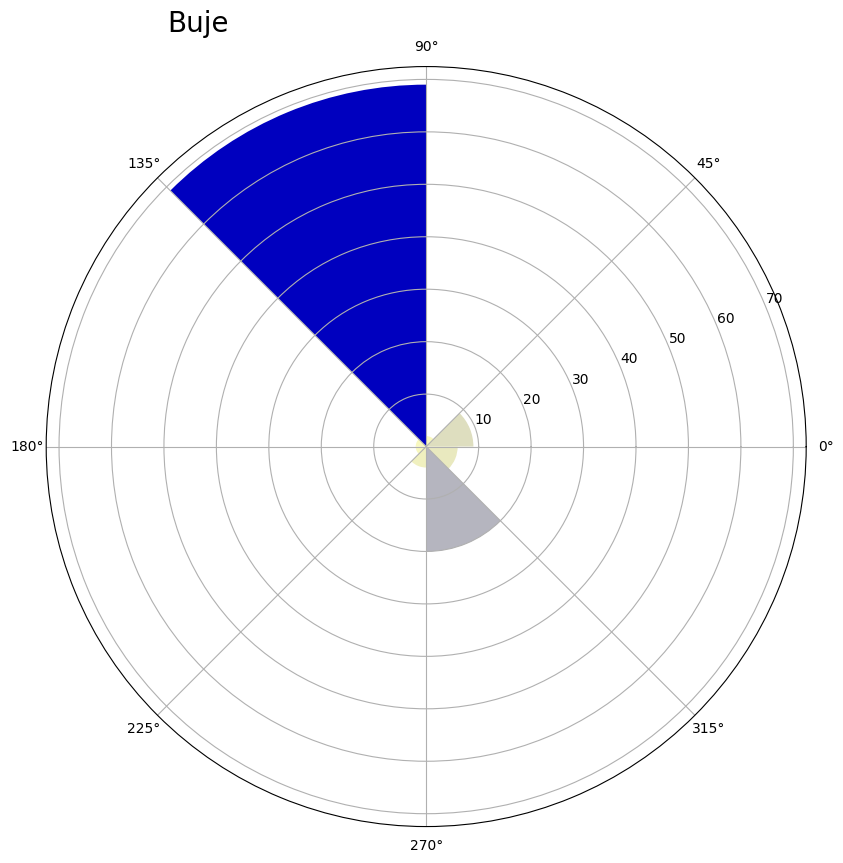

In [55]:
hist, bins = np.histogram(df_buje['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Buje', max(hist))

[13 47 10  3  7  2 26  6]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


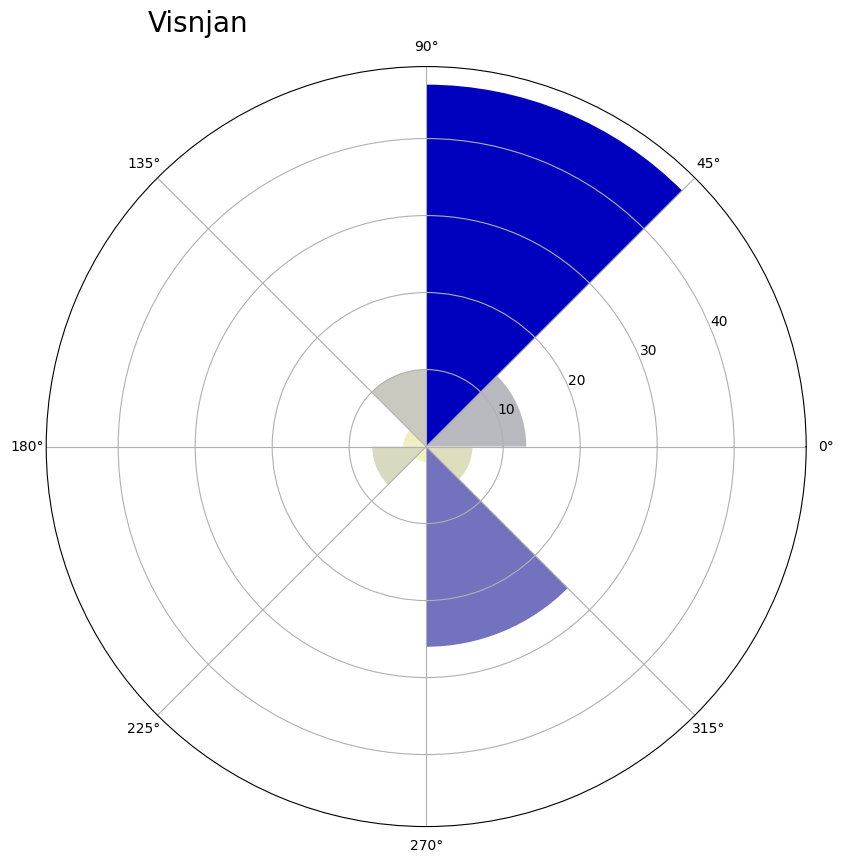

In [56]:

hist, bins = np.histogram(df_visnjan['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Visnjan', max(hist))

[30 26  7  6  3  4 20 18]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


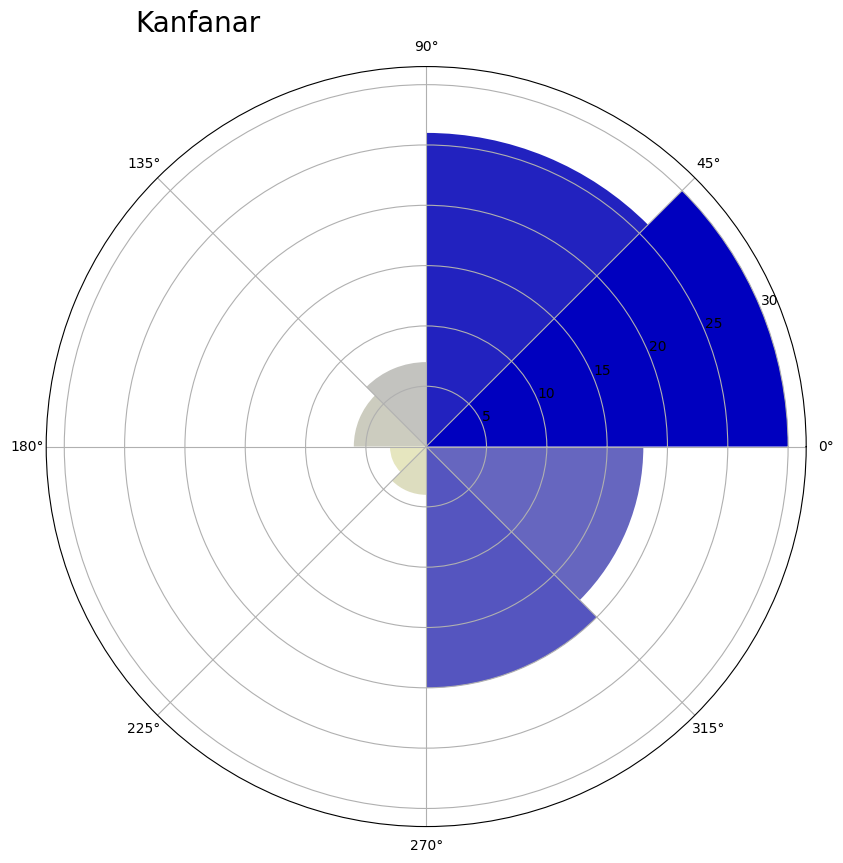

In [57]:

hist, bins = np.histogram(df_kanfanar['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Kanfanar', max(hist))

[37 24  3  8  2  5 18 17]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


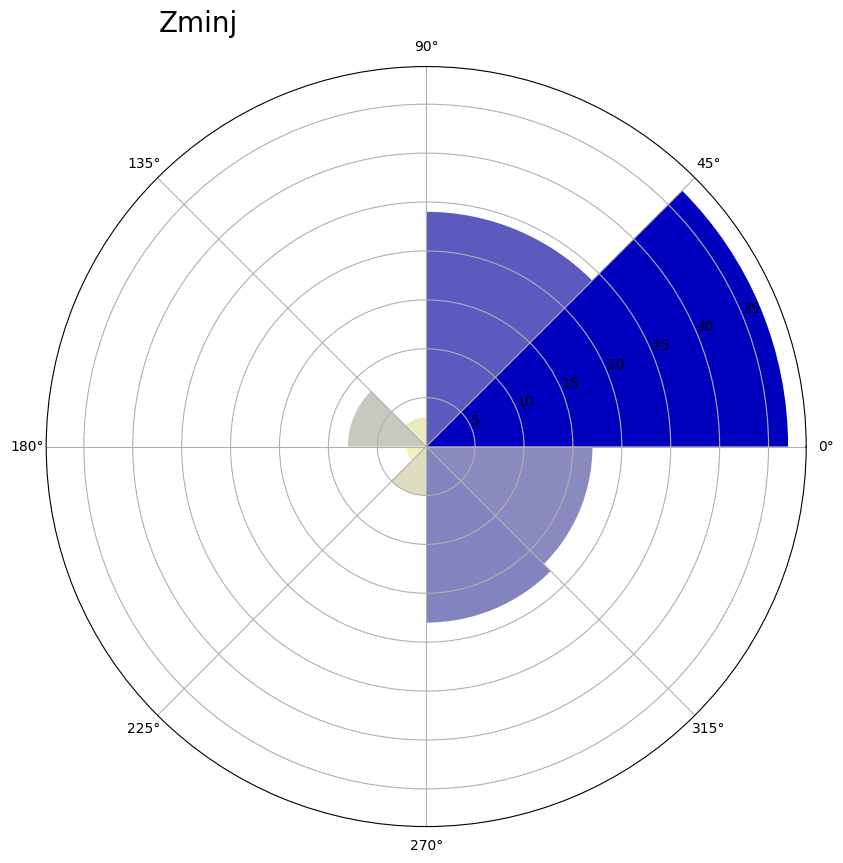

In [58]:

hist, bins = np.histogram(df_zminj['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Zminj', max(hist))

[48 20 15  0  0  7 21  3]
[  0.  45.  90. 135. 180. 225. 270. 315. 360.]


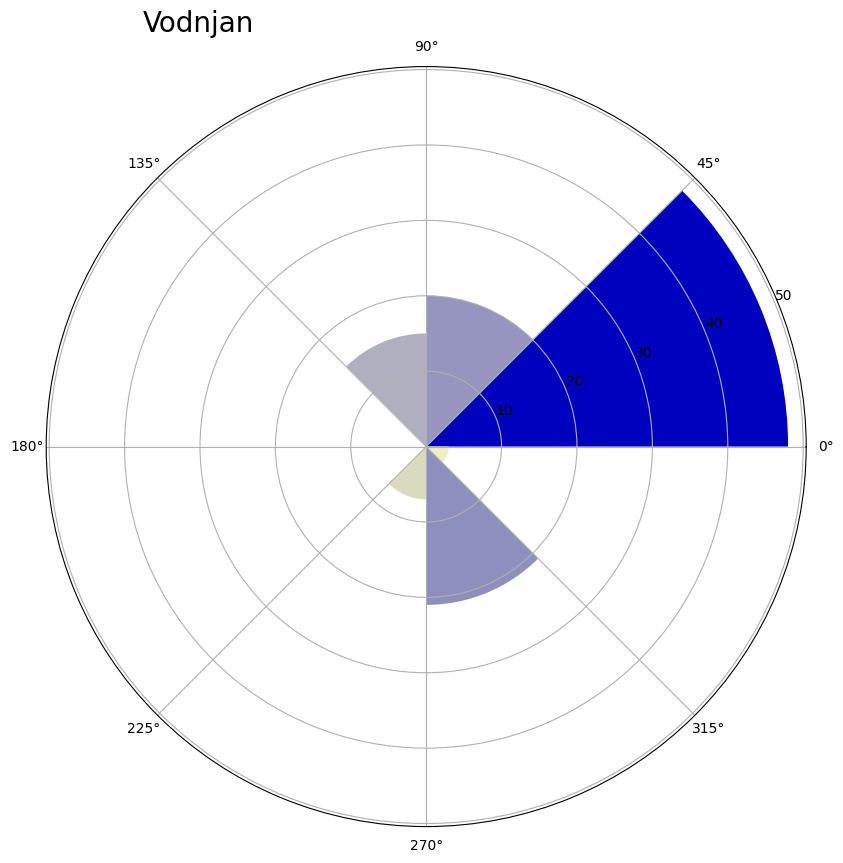

In [59]:

hist, bins = np.histogram(df_vodnjan['wind_deg'], 8, [0, 360])
print(hist)
print(bins)
show_wind_rose(hist, 'Vodnjan', max(hist))

## ZAKLJUCAK

Iako nam je skup podataka malen. Vidimo razlike izmedu gradova blize i dalje od mora. Gradovi blize moru u prosjeku su imali visu temp (potgovo vidljvo kod prosjecnje temperature) i vecu vlaznost zraka. Smjer i jacina vjetra ne cine se povezani za samu udaljenost od mora.

Za bolje rezultate istrazivanje bi bilo potrebno provesti na vecem broju gradova, potrencijalno usporedit razlika van i unutar regije, mozda regija ima veceg utjecaja od mora, isto tako bilo bi dobro istrazivanje napravit na duzi vremenski period barem 1 godinu, iako veci broj godina (desetljeca) bi bilo optimalno